___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [167]:
ad_data=pd.read_csv("advertising.csv")

**Check the head of ad_data**

In [168]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [169]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [170]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

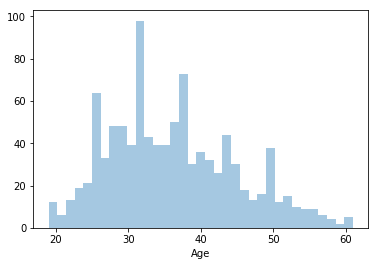

In [171]:
sns.distplot(ad_data['Age'], bins=35, kde=False)

**Create a jointplot showing Area Income versus Age.**

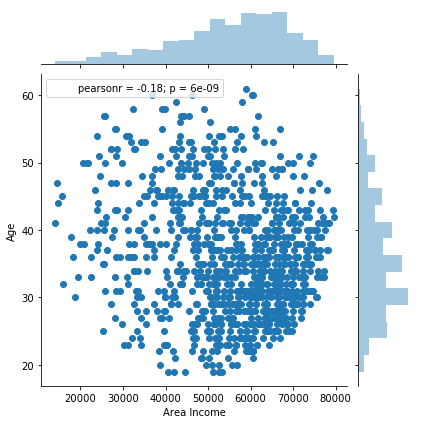

In [172]:
sns.jointplot('Area Income', 'Age', ad_data, kind='scatter')

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

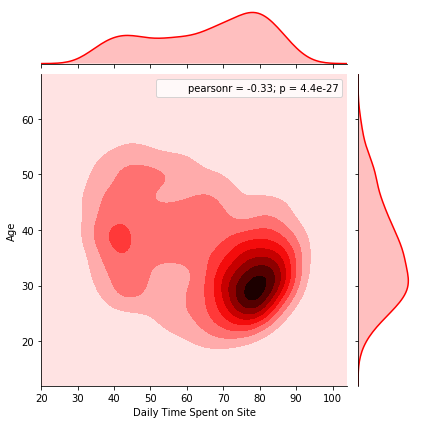

In [173]:
sns.jointplot('Daily Time Spent on Site', 'Age', ad_data, kind='kde', color='Red')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

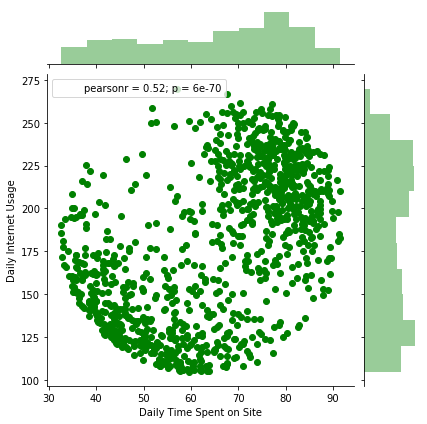

In [174]:
sns.jointplot('Daily Time Spent on Site', 'Daily Internet Usage', ad_data, kind='scatter', color='Green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

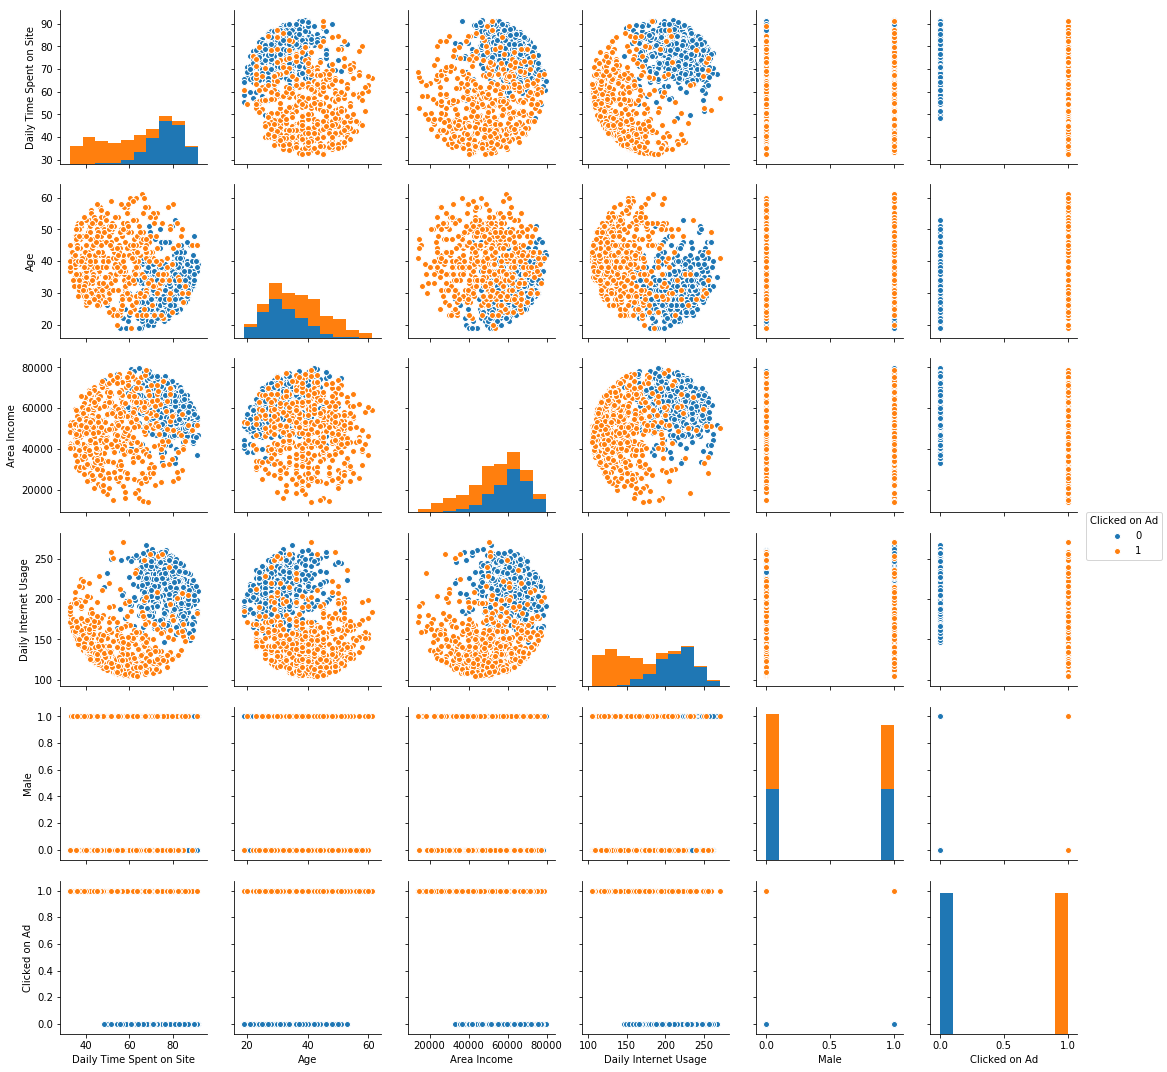

In [175]:
sns.pairplot(ad_data, hue="Clicked on Ad")

In [176]:
# From here we begin to alter the df to get the columns that we think will be important
# Because I think that location is important, I want to first explore the locations and see if there are any unique locations
len(set(list(ad_data['Country'].values)))

237

In [177]:
# Here we will create a Location columns that will concatenate the country with a city to create a pair
ad_data['Location']=ad_data['City']+', '+ad_data['Country']
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Location
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,"Wrightburgh, Tunisia"
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,"West Jodi, Nauru"
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,"Davidton, San Marino"
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,"West Terrifurt, Italy"
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,"South Manuel, Iceland"
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,"Jamieberg, Norway"
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0,"Brandonstad, Myanmar"
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1,"Port Jefferybury, Australia"
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0,"West Colin, Grenada"
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0,"Ramirezton, Ghana"


In [178]:
# This will check if there are any unique cit, country pairs
len(set(list(ad_data['Location'].values)))

1000

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

In [179]:
ad_data=ad_data.drop('Location', axis=1)

In [180]:
# Because there are no unique city, country pairs, we will drop the city columns as wel
ad_data=ad_data.drop('City', axis=1)

In [181]:
# Let us now extract the month from the timestamp data
timestamp_list=ad_data['Timestamp'].values
#print(type(timestamp_list[0]))
month_list=[d[5:7] for d in timestamp_list]
indexes=[num for num in list(range(len(month_list)))]

In [182]:
month_df=pd.DataFrame(data=month_list,index=indexes, columns=['Month'])
month_df
ad_data=pd.concat([ad_data, month_df],axis=1)

In [183]:
ad_data=ad_data.drop('Timestamp', axis=1)
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Country,Clicked on Ad,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,Tunisia,0,03
1,80.23,31,68441.85,193.77,Monitored national standardization,1,Nauru,0,04
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,San Marino,0,03
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,Italy,0,01
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,Iceland,0,06
5,59.99,23,59761.56,226.74,Sharable client-driven software,1,Norway,0,05
6,88.91,33,53852.85,208.36,Enhanced dedicated support,0,Myanmar,0,01
7,66.00,48,24593.33,131.76,Reactive local challenge,1,Australia,1,03
8,74.53,30,68862.00,221.51,Configurable coherent function,1,Grenada,0,04
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,1,Ghana,0,07


In [184]:
# We now have to turn the Month into categorical data since it is currently a string
month=pd.get_dummies(ad_data['Month'],drop_first=True)
month

,02,03,04,05,06,07
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,0
5,0,0,0,1,0,0
6,0,0,0,0,0,0
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,0,0,1


In [185]:
ad_data=pd.concat([ad_data, month], axis=1)

In [186]:
ad_data=ad_data.drop("Month", axis=1)

In [187]:
# The only feasible way I can think we can generally use the ad topic line is by looking at the length of each line
atl_list=ad_data["Ad Topic Line"].values
length_list=[len(line) for line in atl_list]
ad_length=pd.DataFrame(data=length_list, columns=['Ad Title Length'])

In [188]:
ad_data=pd.concat([ad_data, ad_length], axis=1)

In [189]:
ad_data=ad_data.drop('Ad Topic Line', axis=1)

In [190]:
# We now have to create the categorical data for the country
country=pd.get_dummies(ad_data['Country'], drop_first=True)
country

,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica (the territory South of 60 deg S),Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
ad_data=pd.concat([ad_data, country], axis=1)

In [193]:
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Clicked on Ad,02,03,04,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,68.95,35,61833.90,256.09,0,Tunisia,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,Nauru,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,San Marino,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,Italy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,Iceland,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,59.99,23,59761.56,226.74,1,Norway,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,88.91,33,53852.85,208.36,0,Myanmar,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,66.00,48,24593.33,131.76,1,Australia,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,74.53,30,68862.00,221.51,1,Grenada,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,69.88,20,55642.32,183.82,1,Ghana,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
ad_data=ad_data.drop('Country', axis=1)

In [195]:
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,02,03,04,05,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,68.95,35,61833.90,256.09,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,59.99,23,59761.56,226.74,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,88.91,33,53852.85,208.36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,66.00,48,24593.33,131.76,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,74.53,30,68862.00,221.51,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,69.88,20,55642.32,183.82,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


** Split the data into training set and testing set using train_test_split**

In [205]:
# Creating the X and y variables
X=ad_data.drop("Clicked on Ad", axis=1)
y=ad_data["Clicked on Ad"]

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

** Train and fit a logistic regression model on the training set.**

In [208]:
from sklearn.linear_model import LogisticRegression as log
logmodel=log()

In [209]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [210]:
predictions=logmodel.predict(X_test)

** Create a classification report for the model.**

In [211]:
from sklearn.metrics import classification_report as cr

In [212]:
print(cr(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      0.94      0.94       171
          1       0.93      0.94      0.94       159

avg / total       0.94      0.94      0.94       330



In [213]:
from sklearn.metrics import confusion_matrix as cm

In [214]:
print(cm(y_test, predictions))

[[160  11]
 [  9 150]]


             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



## Great Job!